# Introduction
<hr style = "border:2px solid black" ></hr>

<div class="alert alert-block alert-warning">
<font color=black>

**What?** Tolerance intervals

</font>
</div>

# Imports
<hr style = "border:2px solid black" ></hr>

In [3]:
from numpy.random import seed
from numpy.random import randn
from numpy import mean
from numpy import sqrt
from scipy.stats import chi2
from scipy.stats import norm
from matplotlib import pyplot

In [4]:
# Generate dataset, mean of 50 and standard deviation of 5
seed(1)
data = 5 * randn(100) + 50

<div class="alert alert-block alert-info">
<font color=black>

- Here, we have 100 observations, therefore 100 degrees of freedom. 
- We do not know the standard deviation, therefore it must be estimated using the mean. 
- This means our degrees of freedom will be (N - 1) or 99

</font>
</div>

In [5]:
n = len(data)
dof = n - 1

<div class="alert alert-block alert-info">
<font color=black><br>

- Next, we must specify the proportional coverage of the data. 
- In this example, we are interested in the middle 95% of the data. 
- The proportion is 95. We must shift this proportion so that it covers the middle 95%, that is from 2.5th percentile to the 97.5th percentile.
- We know that the critical value for 95% is 1.96 given that we use it so often; nevertheless, we can calculate it directly in Python using the percentage point function 

<br></font>
</div>

In [6]:
prop = 0.95
prop_inv = (1.0 - prop) / 2.0
gauss_critical = norm.ppf(prop_inv)

<div class="alert alert-block alert-info">
<font color=black>

- Next, we need to calculate the confidence of the coverage. 
- We can do this by retrieving the critical value from the Chi-Squared distribution for the given number of degrees of freedom and desired probability. 
- We can use the chi2.ppf() SciPy function 

</font>
</div>

In [8]:
prob = 0.99
prop_inv = 1.0 - prob
chi_critical = chi2.ppf(prop_inv, dof)

# calculate tolerance interval
interval = sqrt((dof * (1 + (1/n)) * gauss_critical**2) / chi_critical)

print('Gaussian critical value: %.3f (coverage=%d%%)' %
      (gauss_critical, prop*100))
print('Chi-Squared critical value: %.3f (prob=%d%%, dof=%d)' % (chi_critical, prob*100,
                                                                dof))
print('Tolerance Interval: %.3f' % interval)

# Summarize
data_mean = mean(data)
lower, upper = data_mean-interval, data_mean+interval
print('%.2f to %.2f covers %d%% of data with a confidence of %d%%' % (lower, upper,
                                                                      prop*100, prob*100))

Gaussian critical value: -1.960 (coverage=95%)
Chi-Squared critical value: 69.230 (prob=99%, dof=99)
Tolerance Interval: 2.355
47.95 to 52.66 covers 95% of data with a confidence of 99%


<div class="alert alert-block alert-info">
<font color=black><br>

- It can also be helpful to demonstrate how the tolerance interval will decrease (become more precise) as the size of the sample is increased. 
- The example below demonstrates this by calculating the tolerance interval for different sample sizes for the same small contrived problem

<br></font>
</div>

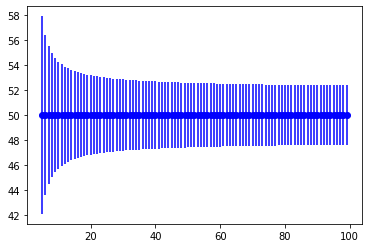

In [14]:
seed(1)
# sample sizes
sizes = range(5, 100)
for n in sizes:
    # generate dataset
    data = 5 * randn(n) + 50
    # calculate degrees of freedom
    dof = n - 1
    # specify data coverage
    prop = 0.95
    prop_inv = (1.0 - prop) / 2.0
    gauss_critical = norm.ppf(prop_inv)
    # specify confidence
    prob = 0.99
    prop_inv = 1.0 - prob
    chi_critical = chi2.ppf(prop_inv, dof)
    # tolerance
    tol = sqrt((dof * (1 + (1/n)) * gauss_critical**2) / chi_critical) # plot
    pyplot.errorbar(n, 50, yerr = tol, color = 'blue', fmt = 'o')
pyplot.show()

<div class="alert alert-block alert-info">
<font color=black><br>

- Running the example creates a plot showing the tolerance interval around the true population mean. 
- We can see that the interval becomes smaller (more precise) as the sample size is increased from 5 to 100 examples. It then reaches a plateau. 

<br></font>
</div>